Import numpy, pandas, matplotlib.pyplot and seaborn library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import Siraj_Stats as sstats

Read citrus.csv dataset

In [2]:
df= pd.read_csv("citrus.csv")

Show top 3 rows

In [3]:
df.head(3)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2


Show bottom 3 rows

In [4]:
df.tail(3)

,name,diameter,weight,red,green,blue
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11
9999,grapefruit,16.45,261.51,152,74,2


Show data info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


Describe data

In [6]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


Show advance stats using Om_stats library

In [7]:
li =["diameter","weight","red","green","blue"]
for i in li:
    sstats.cal_stats(i,df[i])
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

diameter
Total Sum 99756.85
Total Count 10000
Minimum 2.96
Maximum 16.45
Range 13.49
Average 9.98
Median 9.98
Mode ModeResult(mode=np.float64(8.42), count=np.int64(29))
Q1 8.46
Q3 11.48
IQR 3.0199999999999996
Lower Whisker 3.9300000000000015
Upper Whisker 16.009999999999998
Variance 3.7937155107750002
Standard Deviation 1.9477462644746621
Skewness -0.028313016667624907
Kurtosis -0.6681866401135328
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
weight
Total Sum 1750507.92
Total Count 10000
Minimum 86.76
Maximum 261.51
Range 174.75
Average 175.05
Median 174.98
Mode ModeResult(mode=np.float64(138.09), count=np.int64(7))
Q1 152.22
Q3 197.7225
IQR 45.5025
Lower Whisker 83.96625
Upper Whisker 265.97625
Variance 853.262576972736
Standard Deviation 29.210658619290598
Skewness 0.022837268468197128
Kurtosis -0.6978991500614264
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
red
Total Sum 1538478
Total Count 10000
Minimum 115
Maximum 192
Range 77
Average 153.85
Median 154.0
Mode ModeResult(m

Show null values in %

In [8]:
df.isnull().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

Show duplicated values

In [9]:
df["name"].value_counts()

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

Convert textual data into numerical form

In [10]:
df=pd.get_dummies(df,dtype=int,drop_first=True)

In [11]:
df

,diameter,weight,red,green,blue,name_orange
0,2.96,86.76,172,85,2,1
1,3.91,88.05,166,78,3,1
2,4.42,95.17,156,81,2,1
3,4.47,95.60,163,81,4,1
4,4.48,95.76,161,72,9,1
...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,0
9996,15.41,254.67,148,68,7,0
9997,15.59,256.50,168,82,20,0
9998,15.92,260.14,142,72,11,0


Show correlation heatmap

<Axes: >

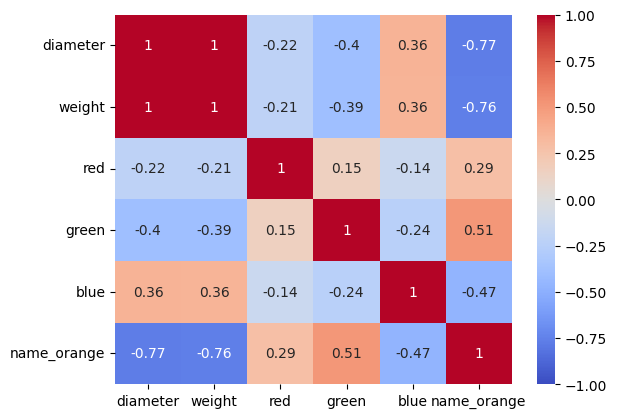

In [12]:
sns.heatmap(df.corr(numeric_only=True),annot =True ,vmin=-1,vmax=1,cmap="coolwarm")

Create pairplot with hue as target

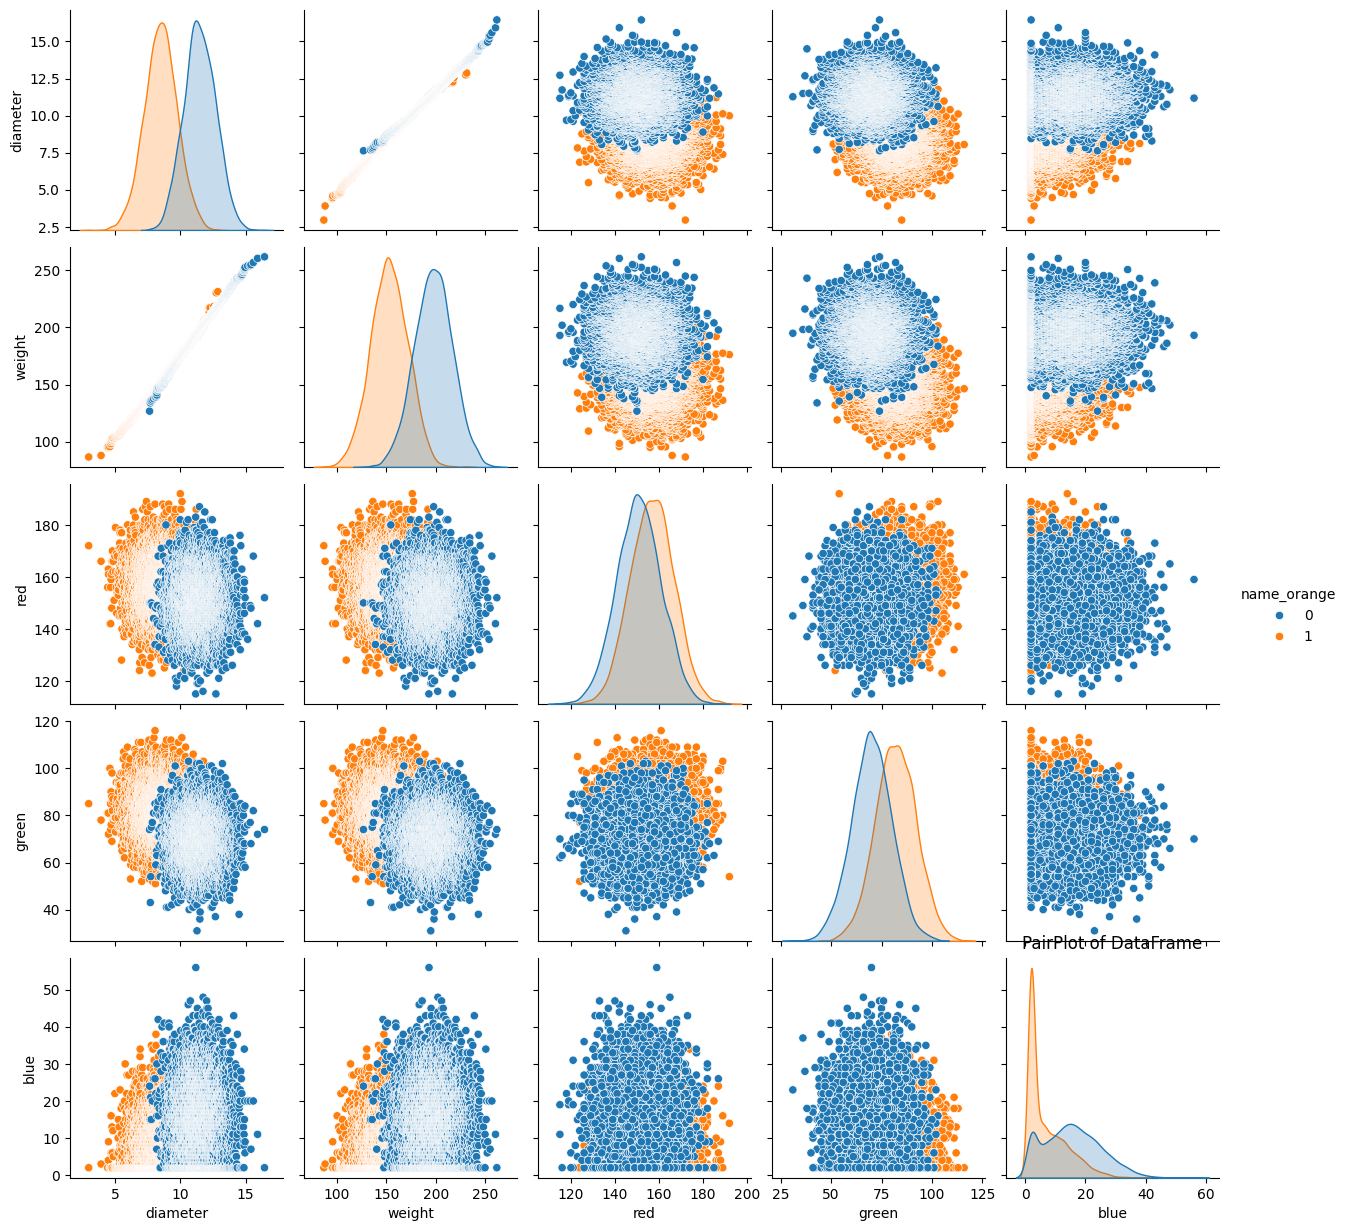

In [13]:
sns.pairplot(data=df,hue="name_orange")
plt.title("PairPlot of DataFrame")
plt.show()

Create boxplot for each column

diameter


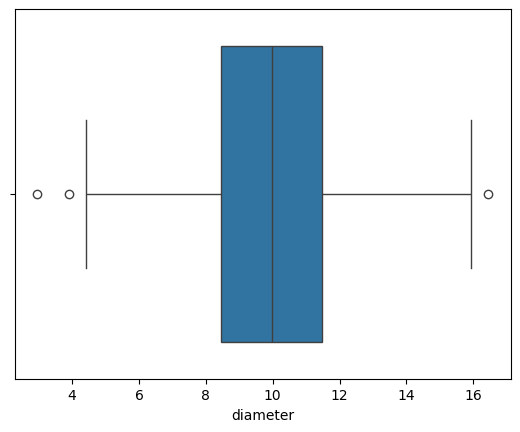

weight


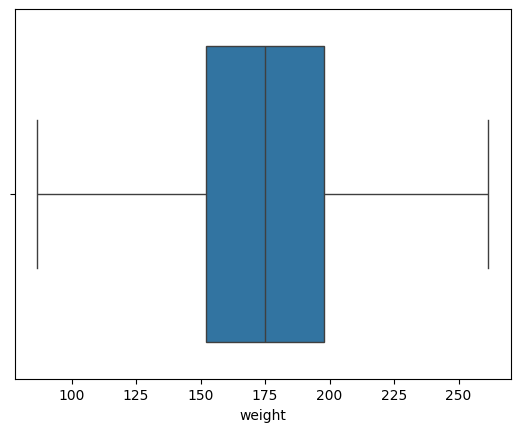

red


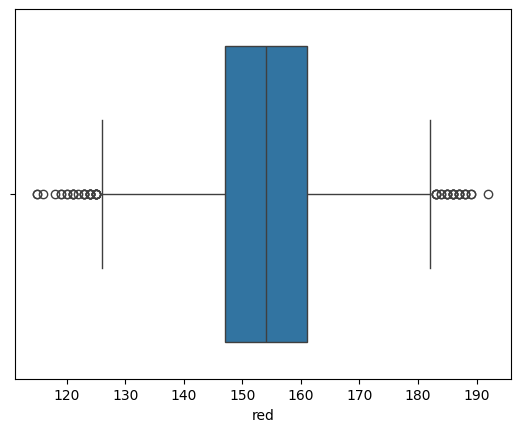

green


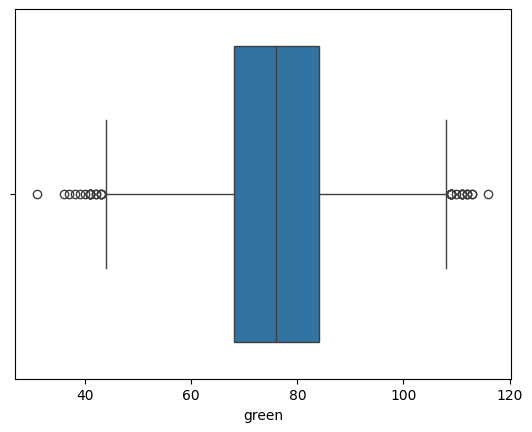

blue


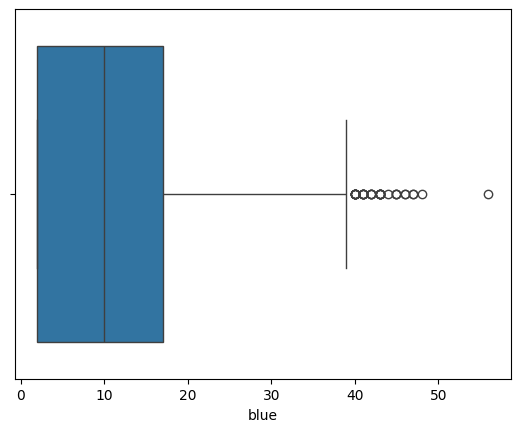

name_orange


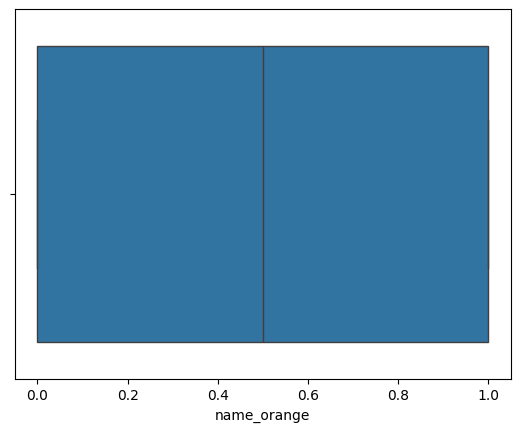

In [14]:
for col_name in df.columns:
    print(col_name)
    sns.boxplot(df,x=df[col_name])
    plt.show()

Create distribution plot for each column

diameter


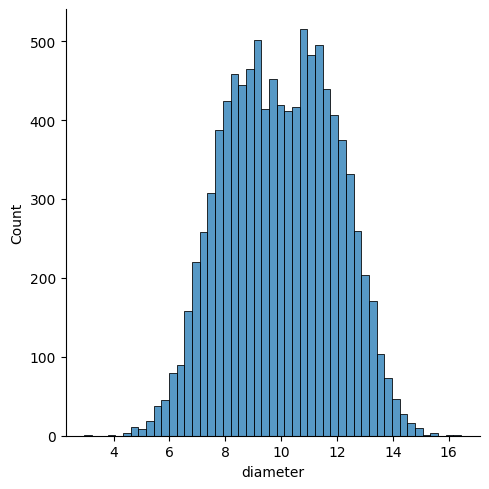

weight


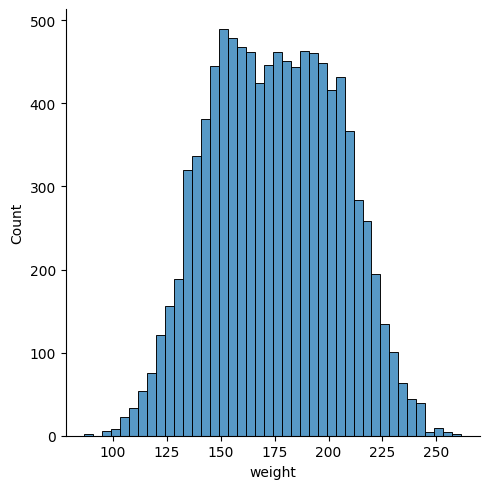

red


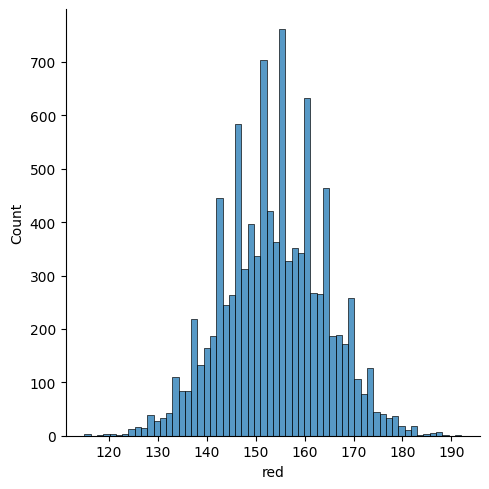

green


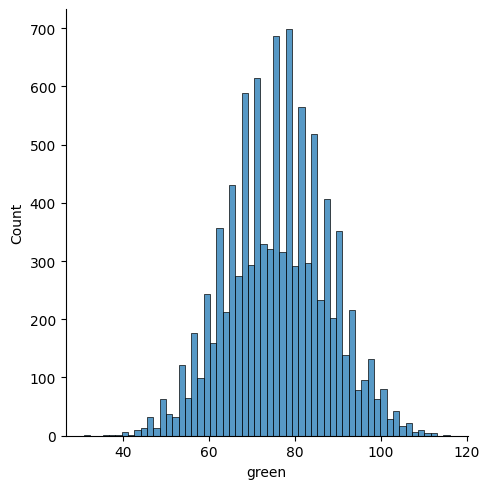

blue


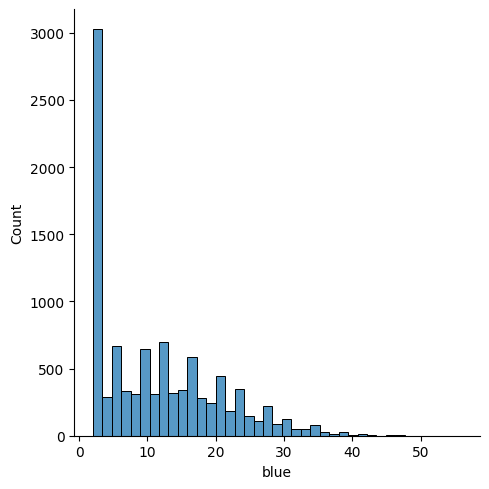

name_orange


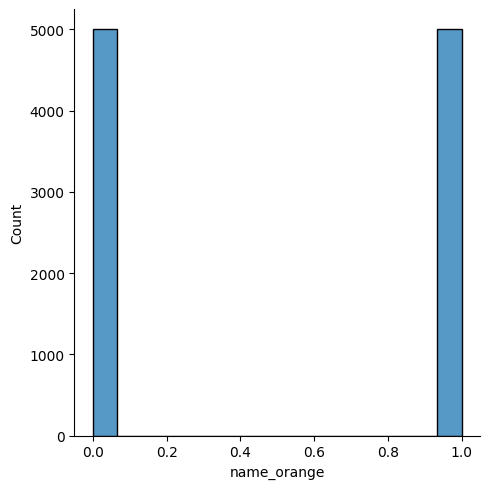

In [15]:
for col_name in df.columns:
    print(col_name)
    sns.displot(df,x=df[col_name])
    plt.show()

Define X and y

In [16]:
X =df.drop("name_orange",axis=1)
y=df["name_orange"]


Standard scale your data

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

Do train test split on data with 20% as test size

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

Perform Logistic Regression on training data and show classification report on testing data

In [19]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [20]:
y_pred = lr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1007
           1       0.95      0.94      0.94       993

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



Use elbow method to choose the best k value for KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
error_li=[]
for k in range(1,21): 
    KNN =KNeighborsClassifier(n_neighbors=k,metric="euclidean")
    KNN.fit(X_train,y_train)
    y_pred = KNN.predict(X_test)
    error = 1-accuracy_score(y_test,y_pred)
    error_li.append(error)
    print(k,1-accuracy_score(y_test,y_pred))

1 0.10699999999999998
2 0.10950000000000004
3 0.08650000000000002
4 0.08599999999999997
5 0.08099999999999996
6 0.08150000000000002
7 0.07699999999999996
8 0.07799999999999996
9 0.07750000000000001
10 0.07750000000000001
11 0.07599999999999996
12 0.07650000000000001
13 0.07550000000000001
14 0.07499999999999996
15 0.07350000000000001
16 0.07450000000000001
17 0.07350000000000001
18 0.07099999999999995
19 0.06899999999999995
20 0.0685


In [22]:
KNN = KNeighborsClassifier(n_neighbors=14,metric="euclidean")
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
accuracy_score(y_test,y_pred)

0.925

In [23]:
min(error_li)

0.0685

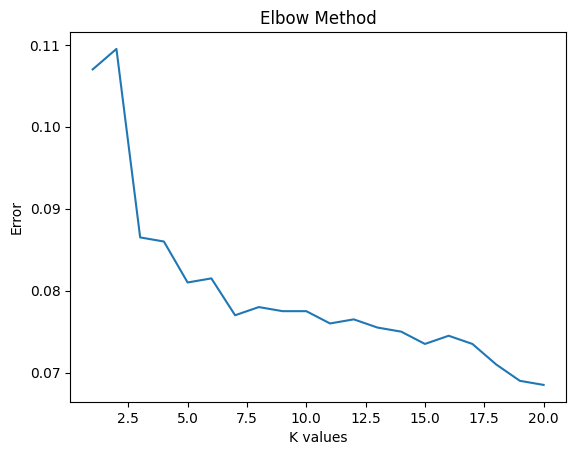

In [24]:
plt.title('Elbow Method')
plt.plot(range(1,21),error_li)
plt.xlabel('K values')
plt.ylabel('Error')
plt.show()


Perform KNN with best k value on training data and show classification report on testing data

In [25]:
KNN = KNeighborsClassifier(n_neighbors=14,metric="euclidean")
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
accuracy_score(y_test,y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1007
           1       0.93      0.92      0.92       993

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.92      2000



In [26]:
df.columns

Index(['diameter', 'weight', 'red', 'green', 'blue', 'name_orange'], dtype='object')

In [ ]:
diameter = float(input("Enter the Diameter here:"))
weight = float(input("Enter the Weight here:"))
red=int(input("Enter the red here:"))
green = int(input("Enter the green here"))
blue=int(input("Enter the blue here:"))
user_input = np.array([diameter,weight,red,green,blue]).reshape(1,-1)
if KNN.predict(user_input)==0:
    print("It's GrapeFruit")
else:
    print("It's Orange")